Title: Characterizing the conformational free-energy landscape of RNA using single-molecule field-effect transistors

Authors: Sukjin S. Jang, Sarah Dubnik, Jason Hon, Colin Nuckolls, Ruben L. Gonzalez, Jr.

This script was used for generating the energy landscape figure in the above Manuscript.

In [1]:
import numpy as np
from numba import jit
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.colors as col
from scipy import ndimage as nd
from matplotlib.collections import LineCollection

In [2]:
def gaussian(x,y,a,b,mx,my,vx,vy):
    return a*np.exp(-.5*((x-mx)**2./vx + (y-my)**2./vy)) + b

In [15]:
def degrid(a):
    #removes grids which are default in matplotlib 3D plots
    a.grid(False)
    
    a.xaxis.pane.fill = False
    a.yaxis.pane.fill = False
    a.zaxis.pane.fill = False
    a.xaxis.pane.set_visible(False)
    a.yaxis.pane.set_visible(False)
    a.zaxis.pane.set_visible(False)
    
    a.set_axis_off()
    
    a.xaxis.line.set_visible(False)
    a.yaxis.line.set_visible(False)
    a.zaxis.line.set_visible(False)


In [4]:
def make_noise(gx,seed=None):
    #generates noise which is used to portray the roughness in the landscape
    if not seed is None:
        np.random.seed(seed)
    noise = (np.random.rand(*gx.shape)-.5)*1.
    noise = nd.gaussian_filter(nd.maximum_filter(noise,25) - nd.minimum_filter(noise,25),4.)
    noise -= noise.min()
    noise /= noise.max()
    noise = np.sqrt(noise)
    noise -= .5
    noise *= z.mean()*2.
    return noise

In [5]:
def make_landscape():
    #returns the coordinates of the energy landscape based on the specified gaussian functions
    global a1,a2,a3,a4,a5,a6,a7,a8,a9,m1,m2,m3,m4,m5,m6,m7,m8,m9
    gx,gy = np.meshgrid(np.linspace(-5,5,1024),np.linspace(-5,5,1024))
    z = -1.*((gaussian(gx,gy,a1,0,m1[0],m1[1],.15,.1) + gaussian(gx,gy,a2,0,m2[0],m2[1],.35,.35)\
            + gaussian(gx,gy,a3,0,m3[0],m3[1],.1,.1) + gaussian(gx,gy,a4,0,m4[0],m4[1],.1,.1)\
            + gaussian(gx,gy,a5,0,m5[0],m5[1],.1,.3) + gaussian(gx,gy,a6,0,m6[0],m6[1],.3,.2)\
            + gaussian(gx,gy,a7,0,m7[0],m7[1],.2,.1) + gaussian(gx,gy,a8,0,m8[0],m8[1],.2,.2)\
            + gaussian(gx,gy,a9,0,m9[0],m9[1],.1,.1)))**compression
    return gx,gy,z

In [6]:
temp = plt.cm.get_cmap('Greys_r', 512)
newcmp = col.ListedColormap(temp(np.linspace(0.05, 0.85, 512)))

In [16]:
def make_plot(gx,gy,z,nlevels=256,fn='test',path=None,pathstart=800):
    #generate the landscape figure based on the coordinates of the energy landscape
    global azim,elev

    nn = 1000

    delta = z.max()-z.min()
    zlow = z.min()-delta*.2
    zhigh = z.max()+delta*.1

    ncut = gx.shape[1]//3
    cmap = newcmp
    from matplotlib.colors import LightSource
    ls = LightSource(135, 30)
    rgb1 = ls.shade(z[:,ncut:], cmap=cmap, vert_exag=0.2, blend_mode='soft')
    rgb2 = ls.shade(z, cmap=cmap, vert_exag=0.1, blend_mode='soft')

    
    fig = plt.figure(figsize=(6,4.5),dpi=300)
    ax = fig.add_subplot(111, projection='3d')

    ax.set_xlim(-5,5)
    ax.set_zlim(zlow,zhigh)
    ax.view_init(elev=elev, azim=azim)
    degrid(ax)
    
    ax.plot_surface(gx,gy,z,facecolors=rgb2,rcount=nlevels,ccount=nlevels,linewidth=0, antialiased=False, shade=False,zorder=0)
    
    ax.plot_surface(gx,gy,np.zeros_like(z)+zlow,facecolors=rgb2,rcount=nlevels,ccount=nlevels,linewidth=0, antialiased=False, shade=False,zorder=-1)
    fig.savefig('%s_part1.png'%(fn),transparent=True)
    
    fig.tight_layout()
    plt.show()
  

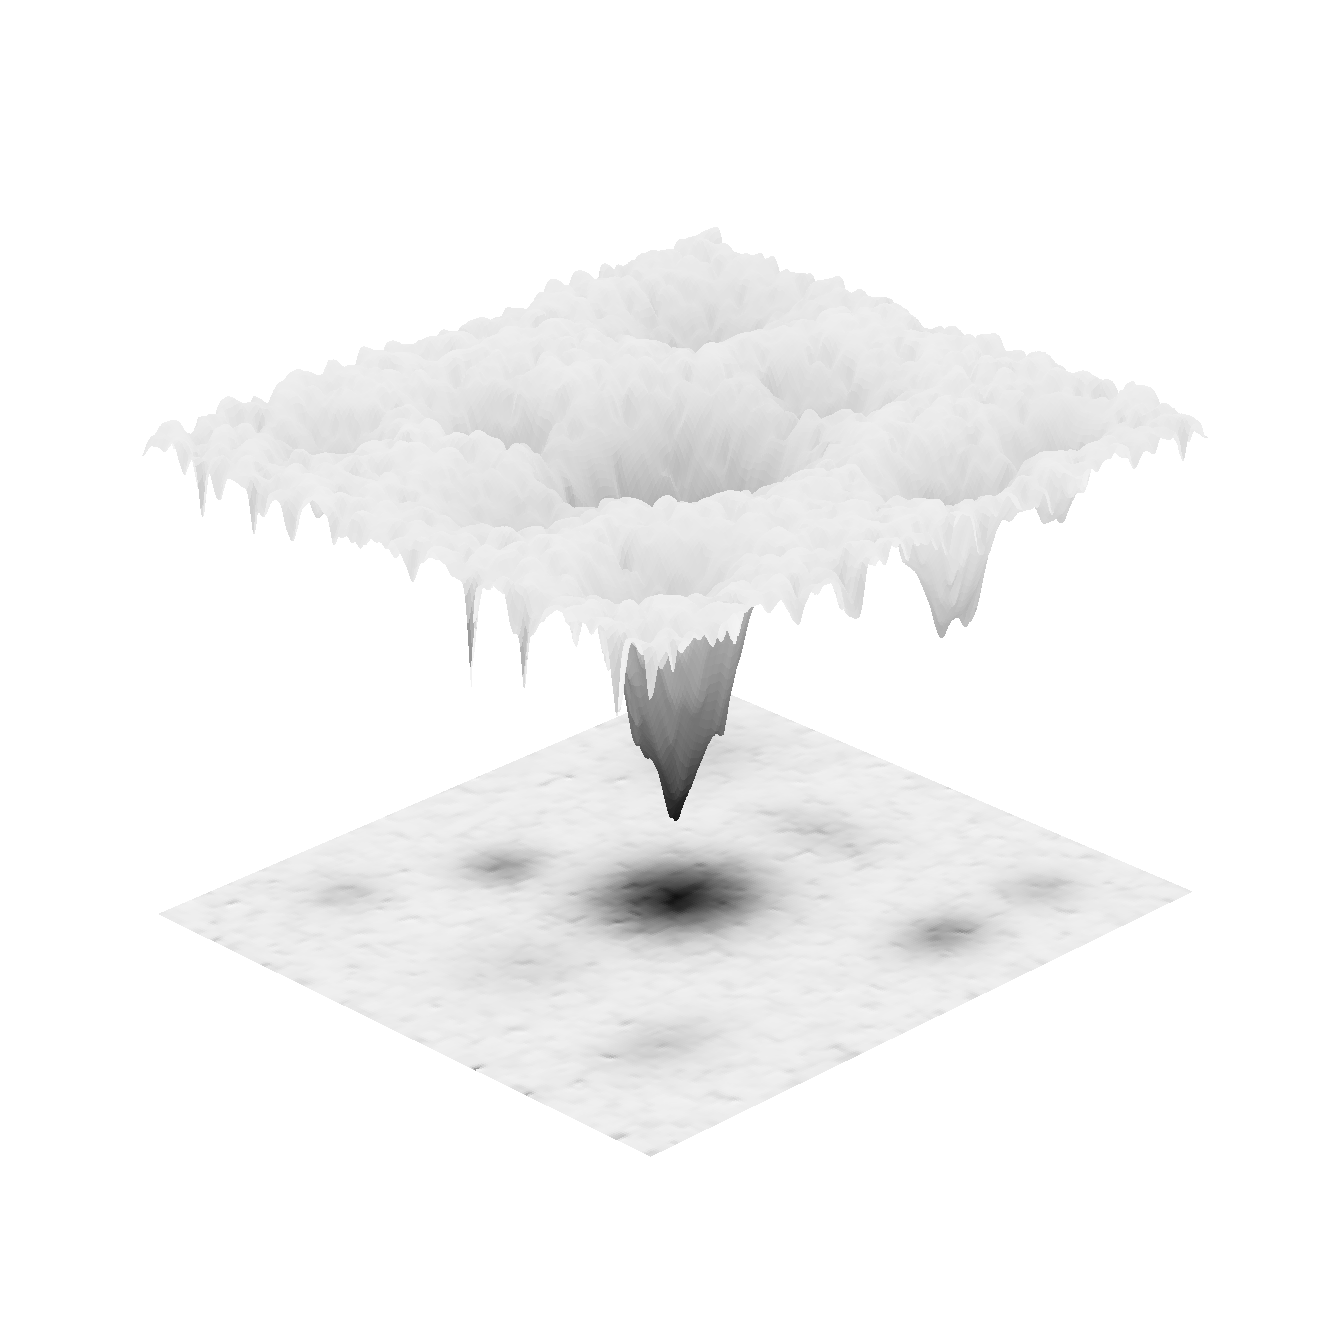

In [17]:
 ## for reproducibility
factor = 1
seed = 101
a1 = 0.2
a2 = 1.0
a3 = 0.2
a4 = 0.07
a5 = 0.05
a6 = 0.04
a7 = 0.06
a8 = 0.03
a9 = 0.04

m1 = [1.7,-3.5]
m2 = [0.,0.]
m3 = [-1.,2.5]
m4 = [3.5,-3.5]
m5 = [2.7,0.]
m6 = [3.2,3.]
m7 = [-3.,-3.]
m8 = [-2.7,0.]
m9 = [-3.,3.5]

azim = 180+45.
elev = 25.
compression = 0.5

gx,gy,z = make_landscape()
noise = make_noise(gx,seed=seed)
z -= 2*noise*factor
z -= z.min() - 1.
make_plot(gx,gy,z,256,'landscape_2')
